In [1]:
import subprocess

command = '/usr/local/bin/Rscript' 
script_path = 'data_cleaning.r'

subprocess.call([command, '--vanilla', script_path])



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Error: 'GamingStudy_data.csv' does not exist in current working directory ('/Users/serenade/Desktop/DSAN-5300-final-project-section45/script').
Execution halted


1

In [6]:
import pandas as pd
data = pd.read_csv('../data/data_cleaned.csv',encoding='ISO-8859-1')
data.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Degree,Birthplace,Residence,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,Game_Category
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,BachelorÂ (or equivalent),USA,USA,Singleplayer,1,23,5.0,USA,USA,1
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,BachelorÂ (or equivalent),USA,USA,Multiplayer - online - with strangers,8,16,33.0,USA,USA,2
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,BachelorÂ (or equivalent),Germany,Germany,Singleplayer,8,17,31.0,DEU,DEU,2
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,BachelorÂ (or equivalent),USA,USA,Multiplayer - online - with online acquaintanc...,0,17,11.0,USA,USA,2
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,High school diploma (or equivalent),USA,South Korea,Multiplayer - online - with strangers,14,14,13.0,KOR,USA,2


In [8]:
age = pd.read_csv('../data/age_final.csv')
age

,Age Group,Proportion,Number of Gamers
0,Under 18s,0.20,618 million
1,18-34 years,0.38,1.17 billion
2,35-44 years,0.14,433 million
3,45-54 years,0.12,371 million
4,55-64 years,0.09,278 million
5,65+ years,0.07,216 million


## EDA

### Select important columns

In [9]:
columns_important_for_analysis = ['GADE', 'Hours', 'SPIN_T'] + [f'SPIN{i}' for i in range(1, 18)]
data = data.dropna(subset=columns_important_for_analysis)

descriptive_stats = data.describe()

descriptive_stats

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,...,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Age,GAD_T,SWL_T,SPIN_T,Game_Category
count,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000,...,12162.000000,12162.00000,12162.000000,12162.000000,12152.000000,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000
mean,7114.303733,42054.842444,0.901332,0.705229,1.010113,0.758346,0.506825,0.950419,0.612728,3.680234,...,1.278984,1.44047,0.636491,0.961602,2.038841,20.938497,5.444993,19.593159,20.205312,4.012333
std,4114.851672,0.272259,0.927767,0.924511,0.980266,0.928794,0.845714,0.929781,0.903171,1.731159,...,1.210254,1.35371,0.969985,1.190894,1.063442,3.262644,4.665875,7.205712,13.513869,1.020236
min,1.000000,42052.004370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,18.000000,0.000000,5.000000,0.000000,1.000000
25%,3549.250000,42054.716895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,18.000000,2.000000,14.000000,10.000000,4.000000
50%,7113.000000,42054.801285,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,...,1.000000,1.00000,0.000000,1.000000,2.000000,20.000000,4.000000,20.000000,18.000000,4.000000
75%,10671.750000,42054.933170,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,2.000000,3.00000,1.000000,2.000000,3.000000,22.000000,8.000000,25.000000,29.000000,4.000000
max,14250.000000,42058.363750,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,...,4.000000,4.00000,4.000000,4.000000,5.000000,56.000000,21.000000,35.000000,68.000000,11.000000


### Group by Game Types

In [10]:
unique_games = data['Game'].unique()

unique_games, len(unique_games)

game_categories = {game: i for i, game in enumerate(unique_games)}

data['Game_Category'] = data['Game'].map(game_categories)

game_categories, data[['Game', 'Game_Category']].head()

({'Skyrim': 0,
  'Other': 1,
  'World of Warcraft': 2,
  'Starcraft 2': 3,
  'League of Legends': 4,
  'Counter Strike': 5,
  'Destiny': 6,
  'Diablo 3': 7,
  'Heroes of the Storm': 8,
  'Hearthstone': 9,
  'Guild Wars 2': 10},
      Game  Game_Category
 0  Skyrim              0
 1   Other              1
 2   Other              1
 3   Other              1
 4   Other              1)

In [11]:
scores_by_game = data.groupby('Game_Category')[['GAD_T', 'SWL_T', 'SPIN_T']].mean()

scores_by_game['Game'] = scores_by_game.index.map({v: k for k, v in game_categories.items()})

scores_by_game = scores_by_game[['Game', 'GAD_T', 'SWL_T', 'SPIN_T']]

scores_by_game.reset_index(drop=True)

,Game,GAD_T,SWL_T,SPIN_T
0,Skyrim,5.086957,21.782609,23.608696
1,Other,5.720348,19.251360,21.058760
2,World of Warcraft,5.380282,19.070423,21.500000
3,Starcraft 2,4.963696,20.966997,18.729373
4,League of Legends,5.431978,19.626466,20.122459
5,Counter Strike,5.360140,18.363636,19.951049
6,Destiny,3.388889,21.555556,17.388889
7,Diablo 3,5.962500,18.387500,24.125000
8,Heroes of the Storm,5.864865,18.513514,22.351351
9,Hearthstone,6.247191,20.033708,19.550562


## Data Visualization

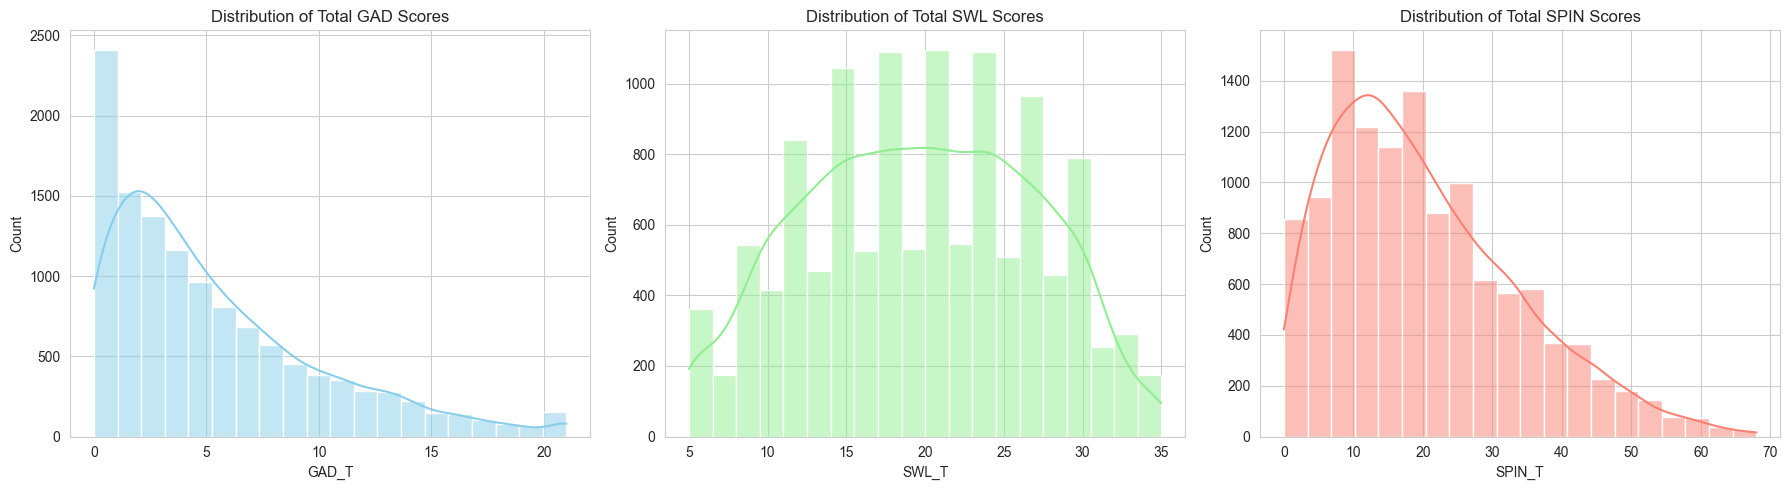

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=data, x="GAD_T", bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Total GAD Scores")

sns.histplot(data=data, x="SWL_T", bins=20, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title("Distribution of Total SWL Scores")

sns.histplot(data=data, x="SPIN_T", bins=20, kde=True, ax=axes[2], color="salmon")
axes[2].set_title("Distribution of Total SPIN Scores")

plt.tight_layout()
plt.show()


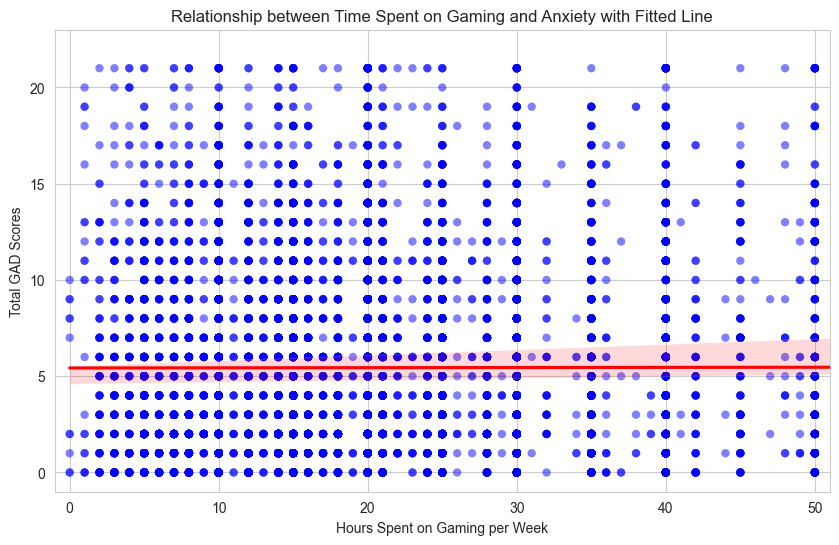

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x="Hours", y="GAD_T", scatter_kws={'alpha':0.5, 'edgecolor':'none', 'color':'blue'}, line_kws={'color':'red'})
plt.title("Relationship between Time Spent on Gaming and Anxiety with Fitted Line")
plt.xlabel("Hours Spent on Gaming per Week")
plt.ylabel("Total GAD Scores")
plt.xlim(-1, (data['Hours'].quantile(0.95)+1))
plt.ylim((data['GAD_T'].min()-1), (data['GAD_T'].max()+2)) 

plt.show()


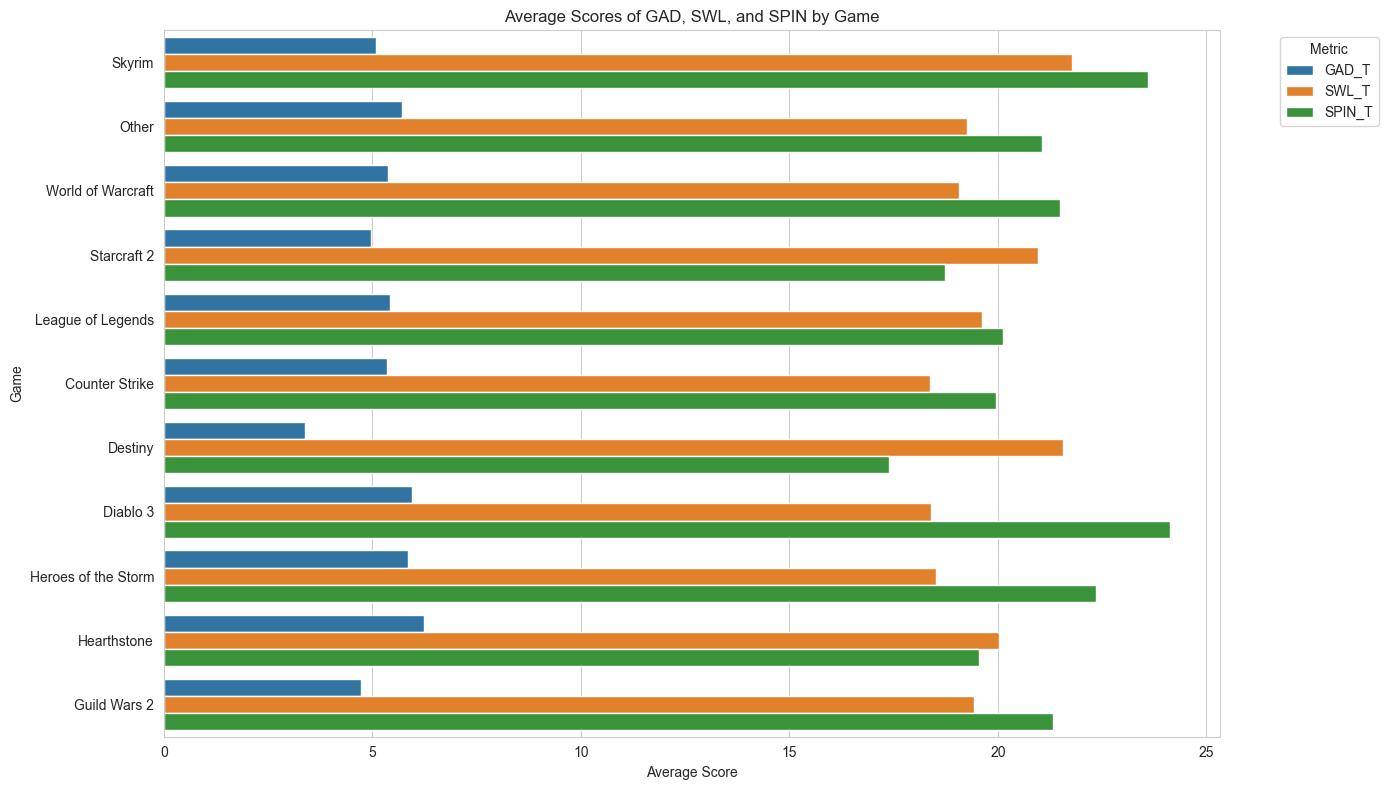

In [14]:
scores_visualization = scores_by_game.melt(id_vars="Game", var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 8))
sns.barplot(x="Score", y="Game", hue="Metric", data=scores_visualization)
plt.title("Average Scores of GAD, SWL, and SPIN by Game")
plt.xlabel("Average Score")
plt.ylabel("Game")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/1g/cyz8p0_51_x80b7fxr3ywkn00000gn/T/ipykernel_15813/1132567139.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores_by_age_group = data.groupby('Age_Group')[['GAD_T', 'SWL_T', 'SPIN_T']].mean().reset_index()


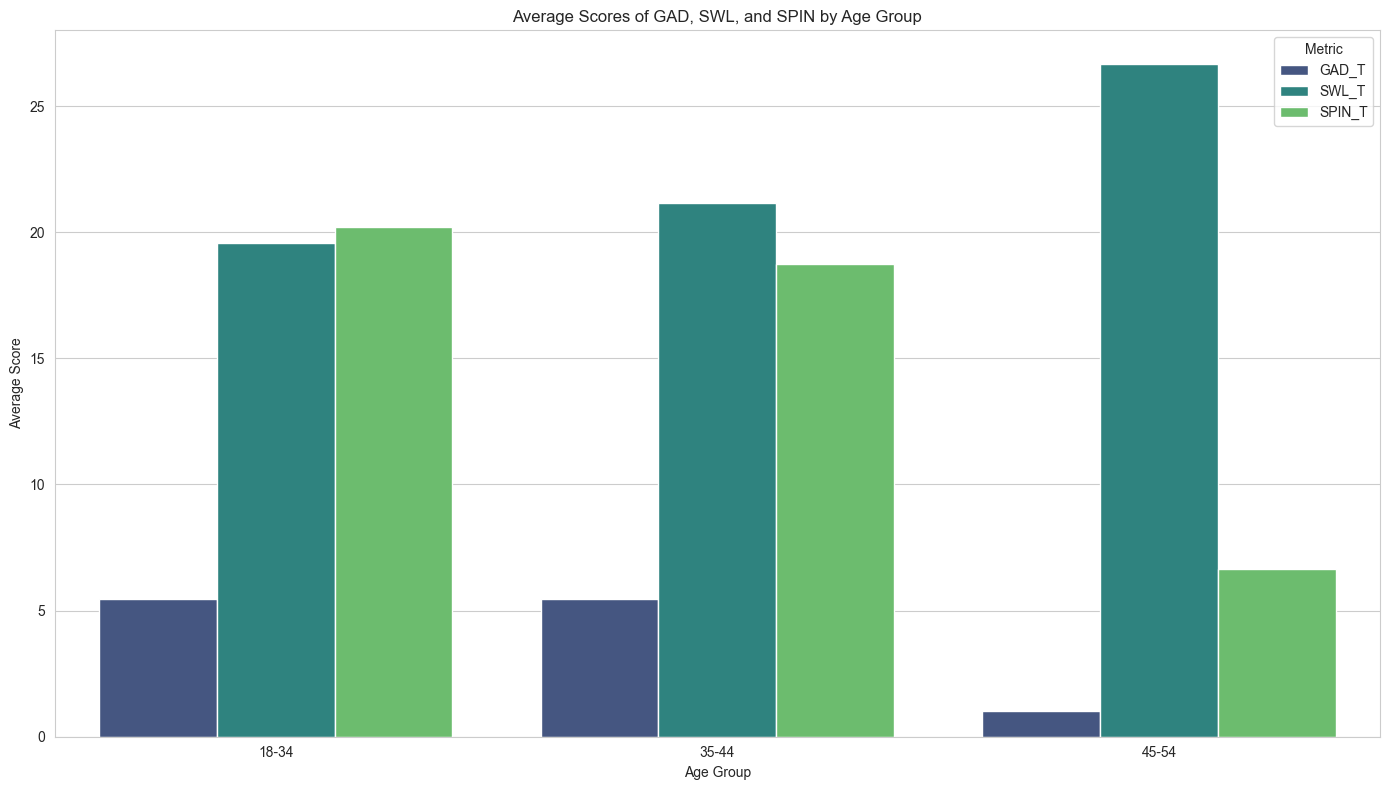

In [15]:
bins = [17, 34, 44, 54]
labels = ['18-34', '35-44', '45-54']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

scores_by_age_group = data.groupby('Age_Group')[['GAD_T', 'SWL_T', 'SPIN_T']].mean().reset_index()

scores_age_group_visualization = scores_by_age_group.melt(id_vars="Age_Group", var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 8))
sns.barplot(x="Age_Group", y="Score", hue="Metric", data=scores_age_group_visualization, palette="viridis")
plt.title("Average Scores of GAD, SWL, and SPIN by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Score")
plt.legend(title="Metric")

plt.tight_layout()
plt.show()


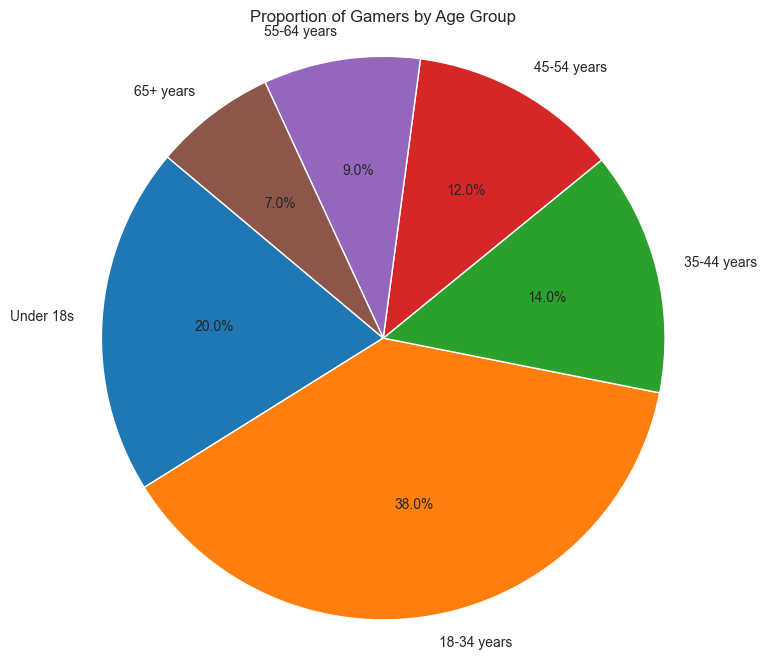

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(age['Proportion'], labels=age['Age Group'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Gamers by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()